In [1]:
import pandas as pd
import numpy as np
from PyRadioLoc.Utils.GeoUtils import GeoUtils
from matplotlib import pyplot as plt
import folium
import math

In [2]:
ds = pd.read_csv("LocTreino_Equipe_7.csv")
ds.head()

,lat,lon,rssi_1_1,rssi_1_2,rssi_1_3,rssi_2_1,rssi_2_2,rssi_2_3,rssi_3_1,rssi_3_2,rssi_3_3,delay_1,delay_2,delay_3,pontoId
0,-8.05350,-34.94862,-84.430000,-87.840000,-88.682857,-68.080,-78.435000,-69.520000,-88.683333,-90.952,-97.2550,5,2,4,7718
1,-8.05004,-34.95311,-88.258571,-95.222857,-88.390000,-92.185,-92.125833,-91.580000,-94.210000,-97.358,-96.1825,3,4,3,8803
2,-8.04802,-34.94762,-96.996429,-80.504286,-93.993571,-90.760,-97.685000,-98.701429,-109.650000,-102.064,-94.4075,3,3,6,9375
3,-8.05192,-34.94780,-91.590000,-93.840000,-89.137143,-49.770,-68.682500,-79.268571,-90.726667,-98.048,-97.6000,4,2,5,8193
4,-8.05197,-34.95227,-80.772857,-92.857143,-78.750000,-85.390,-90.067500,-93.081429,-90.976667,-93.826,-95.6050,4,4,3,8152


In [3]:
ds.shape

(1500, 15)

In [4]:
ds2 = pd.read_csv("Bts.csv")
ds2

,grupo,btsId,lat,lon,cch,azimuth,RssiId,Eirp
0,1,BTS_1_1,-8.04342,-34.952000,873,0,rssi_1_1,55.59
1,1,BTS_1_2,-8.04342,-34.952000,872,120,rssi_1_2,55.59
2,1,BTS_1_3,-8.04342,-34.952000,875,240,rssi_1_3,55.59
3,2,BTS_2_1,-8.05289,-34.944672,865,0,rssi_2_1,55.59
4,2,BTS_2_2,-8.05289,-34.944672,874,120,rssi_2_2,55.59
5,2,BTS_2_3,-8.05289,-34.944672,871,240,rssi_2_3,55.59
6,3,BTS_3_1,-8.05532,-34.957900,877,0,rssi_3_1,55.59
7,3,BTS_3_2,-8.05532,-34.957900,881,120,rssi_3_2,55.59
8,3,BTS_3_3,-8.05532,-34.957900,869,240,rssi_3_3,55.59


In [5]:
ds = ds.drop(columns=['pontoId'])

In [6]:
bts1_lat = ds2['lat'].iloc[0]
bts1_lon = ds2['lon'].iloc[0]
bts2_lat = ds2['lat'].iloc[3]
bts2_lon = ds2['lon'].iloc[3]
bts3_lat = ds2['lat'].iloc[6]
bts3_lon = ds2['lon'].iloc[6]

In [7]:
dist_bts1 = []
for i in range(ds.shape[0]):
    d1 = math.sqrt(55590)/(4*math.pi*ds['rssi_1_1'].iloc[i]*-1)
    d2 = math.sqrt(55590)/(4*math.pi*ds['rssi_1_2'].iloc[i]*-1)
    d3 = math.sqrt(55590)/(4*math.pi*ds['rssi_1_3'].iloc[i]*-1)
    d = (d1+d2+d3)/3
    dist_bts1.append(d)
dist_bts1[:10]

[0.2157964278747219,
 0.20729655053815907,
 0.20870286015273984,
 0.20509387758801267,
 0.2241984644231654,
 0.20825426871715882,
 0.2285200490937341,
 0.19491218467935525,
 0.21676079321584893,
 0.21423254928900104]

In [8]:
ds['dist_bts_1'] = ds.apply(lambda x: GeoUtils.distanceInKm(x.lat, x.lon, bts1_lat, bts1_lon), axis=1)
ds['dist_bts_2'] = ds.apply(lambda x: GeoUtils.distanceInKm(x.lat, x.lon, bts2_lat, bts2_lon), axis=1)
ds['dist_bts_3'] = ds.apply(lambda x: GeoUtils.distanceInKm(x.lat, x.lon, bts3_lat, bts3_lon), axis=1)

In [9]:
ds.head()

,lat,lon,rssi_1_1,rssi_1_2,rssi_1_3,rssi_2_1,rssi_2_2,rssi_2_3,rssi_3_1,rssi_3_2,rssi_3_3,delay_1,delay_2,delay_3,dist_bts_1,dist_bts_2,dist_bts_3
0,-8.05350,-34.94862,-84.430000,-87.840000,-88.682857,-68.080,-78.435000,-69.520000,-88.683333,-90.952,-97.2550,5,2,4,1.175420,0.440382,1.042537
1,-8.05004,-34.95311,-88.258571,-95.222857,-88.390000,-92.185,-92.125833,-91.580000,-94.210000,-97.358,-96.1825,3,4,3,0.742299,0.982072,0.787258
2,-8.04802,-34.94762,-96.996429,-80.504286,-93.993571,-90.760,-97.685000,-98.701429,-109.650000,-102.064,-94.4075,3,3,6,0.701374,0.629039,1.391353
3,-8.05192,-34.94780,-91.590000,-93.840000,-89.137143,-49.770,-68.682500,-79.268571,-90.726667,-98.048,-97.6000,4,2,5,1.047885,0.361100,1.175099
4,-8.05197,-34.95227,-80.772857,-92.857143,-78.750000,-85.390,-90.067500,-93.081429,-90.976667,-93.826,-95.6050,4,4,3,0.946064,0.843679,0.722771


In [10]:
rss_1_med = []
rss_2_med = []
rss_3_med = []

for i in range(ds.shape[0]):
    r1 = (ds['rssi_1_1'].iloc[i] + ds['rssi_1_2'].iloc[i] + ds['rssi_1_3'].iloc[i])/3
    rss_1_med.append(r1)
    r2 = (ds['rssi_2_1'].iloc[i] + ds['rssi_2_2'].iloc[i] + ds['rssi_2_3'].iloc[i])/3
    rss_2_med.append(r2)
    r3 = (ds['rssi_3_1'].iloc[i] + ds['rssi_3_2'].iloc[i] + ds['rssi_3_3'].iloc[i])/3
    rss_3_med.append(r3)

aux = []
for col in ds:
    if "rssi" in col:
        aux.append(col)
ds = ds.drop(columns=aux)
ds['rssi_1_med'] = rss_1_med
ds['rssi_2_med'] = rss_2_med
ds['rssi_3_med'] = rss_3_med

In [11]:
ds.head()

,lat,lon,delay_1,delay_2,delay_3,dist_bts_1,dist_bts_2,dist_bts_3,rssi_1_med,rssi_2_med,rssi_3_med
0,-8.05350,-34.94862,5,2,4,1.175420,0.440382,1.042537,-86.984286,-72.011667,-92.296778
1,-8.05004,-34.95311,3,4,3,0.742299,0.982072,0.787258,-90.623810,-91.963611,-95.916833
2,-8.04802,-34.94762,3,3,6,0.701374,0.629039,1.391353,-90.498095,-95.715476,-102.040500
3,-8.05192,-34.94780,4,2,5,1.047885,0.361100,1.175099,-91.522381,-65.907024,-95.458222
4,-8.05197,-34.95227,4,4,3,0.946064,0.843679,0.722771,-84.126667,-89.512976,-93.469222


In [17]:
x = ds.iloc[:,5:]
y = ds.iloc[:,0:2]

x_train = x[:1250]
y_train = y[:1250]
x_test = x[1250:]
y_test = y[1250:]

In [27]:
x_test = x_test.iloc[:,3:]
x_test

,rssi_1_med,rssi_2_med,rssi_3_med
1250,-93.315714,-87.919167,-94.736167
1251,-90.468333,-83.785833,-88.711833
1252,-92.936667,-96.598294,-80.779000
1253,-83.954762,-98.233810,-93.914333
1254,-92.216667,-86.281071,-88.390778
...,...,...,...
1495,-95.041429,-93.358571,-95.401167
1496,-99.631429,-83.716548,-95.719389
1497,-88.969048,-73.039167,-92.448333
1498,-91.310000,-93.906111,-79.493000


In [33]:
def get_neibor(pat, dataset):
    ds_copy = dataset.iloc[:,3:].values
    dists = []    
    for i in range(ds_copy.shape[0]):
        distance = math.sqrt(sum([(a - b) ** 2 for a, b in zip(pat, ds_copy[i])]))
        dists.append(distance)
    return dists.index(min(dists))

In [34]:
get_neibor(x_test.iloc[2], x_train)

452

In [41]:
def gen_dist(pat, dataset):
    ind = get_neibor(pat, dataset)
    best = dataset.iloc[ind]
    d1 = best['dist_bts_1']
    d2 = best['dist_bts_2']
    d3 = best['dist_bts_3']
    dd1 = math.sqrt((d1 ** 2)*(best['rssi_1_med'])/pat['rssi_1_med'])
    dd2 = math.sqrt((d2 ** 2)*(best['rssi_2_med'])/pat['rssi_2_med'])
    dd3 = math.sqrt((d3 ** 2)*(best['rssi_3_med'])/pat['rssi_3_med'])
    return (dd1, dd2, dd3)

In [42]:
gen_dist(x_test.iloc[2], x_train)

(1.1084184147773912, 1.2513141053567736, 0.3647313290953244)

In [76]:
import math, numpy

def get_coords(pat, dataset):
    distA, distB, distC = gen_dist(pat, dataset)
    
    latA = bts1_lat
    lonA = bts1_lon
    latB = bts2_lat
    lonB = bts2_lon
    latC = bts3_lat
    lonC = bts3_lon
    earthRadius = 6371

    xA = earthRadius * (math.cos( math.radians( latA )) * math.cos( math.radians( lonA )))
    yA = earthRadius * (math.cos( math.radians( latA )) * math.sin( math.radians( lonA )))
    zA = earthRadius * (math.sin(math.radians(latA)))                           

    xB = earthRadius * (math.cos( math.radians( latB )) * math.cos( math.radians( lonB )))
    yB = earthRadius * (math.cos( math.radians( latB )) * math.sin( math.radians( lonB )))
    zB = earthRadius * (math.sin(math.radians(latB)))

    xC = earthRadius * (math.cos( math.radians( latC )) * math.cos( math.radians( lonC )))
    yC = earthRadius * (math.cos( math.radians( latC )) * math.sin( math.radians( lonC )))
    zC = earthRadius * (math.sin(math.radians(latC)))

    P1 = numpy.array([xA, yA, zA])
    P2 = numpy.array([xB, yB, zB])
    P3 = numpy.array([xC, yC, zC])
    ex = (P2 - P1) / (numpy.linalg.norm(P2 - P1))       # Vetor unitário da direção de P1 para P2
    i = numpy.dot(ex, P3 - P1)                          # Magnitude do sinal da componente x, do vetor de P1 para P3 
    ey = (P3 - P1 - i*ex) / (numpy.linalg.norm(P3 - P1 - i*ex))     # Vetor unitário da direção de y 
    ez = numpy.cross(ex, ey)                                        # ez é o produto cartesiano entre (ex) x (ey)

    d = numpy.linalg.norm(P2 - P1)         # distância entre os centros de P1 (0,0) e P2(d,0) 
    j = numpy.dot(ey, P3 - P1)

    x = ( pow(distA, 2) - pow(distB, 2) + pow(d, 2)) / (2*d)                          # x = ((r1^2 - r2^2 + d^2)^2) / (4d^2)
    y = ((pow(distA, 2) - pow(distC, 2) + pow(i, 2) + pow(j,2)) / (2*j)) - ((i/j)*x)  # y = (r1^2 - r3^2 + i^2 +j^2)/2j - (i/j)x
    aux = pow(distA, 2) - pow(x, 2) - pow(y, 2)
    if aux < 0:
        aux = -aux
    z = numpy.sqrt(aux)                             # z = +-sqrt(r1^2 - x^2 - y^2)
    
    triPt = P1 + x*ex + y*ey + z*ez
    
    lat = math.degrees(math.asin(triPt[2] / earthRadius))
    lon = math.degrees(math.atan2(triPt[1], triPt[0]))
    return(lat, lon)

In [77]:
get_coords(x_test.iloc[2], x_train)

(-8.052493851577623, -34.956042927100135)

In [78]:
y_pred = []
for i in range(x_test.shape[0]):
    y_pred.append(get_coords(x_test.iloc[i], x_train))
y_pred

[(-8.050969644421311, -34.95058058280458),
 (-8.053669878560303, -34.949168721110645),
 (-8.052493851577623, -34.956042927100135),
 (-8.0486723554912, -34.9576402642447),
 (-8.047114179634837, -34.945236342778124),
 (-8.05453061292901, -34.95363282847119),
 (-8.051556693282928, -34.9598807897906),
 (-8.055447234874425, -34.953950511149216),
 (-8.046873330507852, -34.94521525266133),
 (-8.055319943989458, -34.9580104060181),
 (-8.051582290077974, -34.94913745068976),
 (-8.048560183541149, -34.958189674150596),
 (-8.05206388053298, -34.9481913577491),
 (-8.056582533255709, -34.955371806739514),
 (-8.051749823963466, -34.947882081342335),
 (-8.053854372692859, -34.94928606513792),
 (-8.049225049895126, -34.95039728679627),
 (-8.049683883637748, -34.94757539719106),
 (-8.05225623466527, -34.94684916304407),
 (-8.054090096101959, -34.95707635201751),
 (-8.054303328783746, -34.95636337054357),
 (-8.04782606556025, -34.95064625119035),
 (-8.056362493434992, -34.955148760503626),
 (-8.05044373

In [79]:
len(y_pred)

250

In [90]:
df = pd.DataFrame({})
df['p_lat'] = [p[0] for p in y_pred]
df['p_lon'] = [p[1] for p in y_pred]
df['o_lat'] = y_test['lat'].values
df['o_lon'] = y_test['lon'].values

In [91]:
df

,p_lat,p_lon,o_lat,o_lon
0,-8.050970,-34.950581,-8.05077,-34.95054
1,-8.053670,-34.949169,-8.04675,-34.94515
2,-8.052494,-34.956043,-8.05330,-34.95973
3,-8.048672,-34.957640,-8.04936,-34.95571
4,-8.047114,-34.945236,-8.05525,-34.95163
...,...,...,...,...
245,-8.053326,-34.954009,-8.04701,-34.94758
246,-8.050194,-34.947693,-8.05158,-34.94996
247,-8.052087,-34.947880,-8.05233,-34.94834
248,-8.055660,-34.958795,-8.05559,-34.95374


In [92]:
df['dist'] = df.apply(lambda x: GeoUtils.distanceInKm(x.p_lat, x.p_lon, x.o_lat, x.o_lon), axis=1)

In [93]:
erro = np.mean(df['dist'].values)

print("Max: ", df['dist'].values.max())
print("Min: ", df['dist'].values.min())
print("Erro: ", erro)

Max:  1.4682902409428442
Min:  0.001000572618283007
Erro:  0.25716332408061093


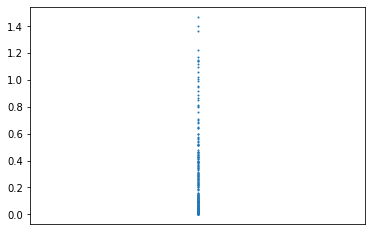

In [94]:
plt.scatter([0]*df.shape[0],df['dist'],s=1)
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
plt.show()

In [95]:
df

,p_lat,p_lon,o_lat,o_lon,dist
0,-8.050970,-34.950581,-8.05077,-34.95054,0.022528
1,-8.053670,-34.949169,-8.04675,-34.94515,0.884271
2,-8.052494,-34.956043,-8.05330,-34.95973,0.416087
3,-8.048672,-34.957640,-8.04936,-34.95571,0.225956
4,-8.047114,-34.945236,-8.05525,-34.95163,1.142944
...,...,...,...,...,...
245,-8.053326,-34.954009,-8.04701,-34.94758,0.995104
246,-8.050194,-34.947693,-8.05158,-34.94996,0.293199
247,-8.052087,-34.947880,-8.05233,-34.94834,0.057354
248,-8.055660,-34.958795,-8.05559,-34.95374,0.557253


In [96]:
positions = df[['o_lat', 'o_lon']].values
predictions = df[['p_lat', 'p_lon']].values

In [97]:
center_lat = np.mean([lat for lat in ds2['lat'].values])
center_lon = np.mean([lon for lon in ds2['lon'].values])
original_pts_map = folium.Map(location=[center_lat, center_lon],
                              zoom_start=15,
                              tiles='CartoDB positron')

In [98]:
for location in positions:
    marker = folium.CircleMarker(location=location,
                                 radius=0.5,
                                 color='blue',
                                 fill_opacity=0.1)
    marker.add_to(original_pts_map)

for location in predictions:
    marker = folium.CircleMarker(location=location,
                                 radius=0.5,
                                 color='purple',
                                 fill_opacity=0.3)
    marker.add_to(original_pts_map)

# Plot BTSs locations
for location in ds2[['lat', 'lon']].values:
    marker = folium.Marker(location=location, color='darkred')
    marker.add_to(original_pts_map)

# Export map
original_pts_map.save("predictions_triangulação_pts2.html")

In [99]:
df.to_csv("triangulação_predicts.csv", index=False, sep=',')